<a href="https://colab.research.google.com/github/KHANmdAFFAN/Data_science/blob/main/CASE_STUDY___TOURISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
%matplotlib inline    
import seaborn as sns   
sns.set(color_codes = True)
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/train_small.csv")

In [ ]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [ ]:
df1=df.copy()

In [ ]:
df.shape

(2380557, 54)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [ ]:
df.nunique()/len(df)*100

search_id                          4.026033
timestamp                          4.014943
site_id                            0.001428
user_country_id                    0.008065
user_hist_stars                    0.012266
user_hist_paid                     0.182520
listing_country_id                 0.006973
listing_id                         4.930695
listing_stars                      0.000252
listing_review_score               0.000420
is_brand                           0.000084
location_score1                    0.014156
location_score2                    0.381507
log_historical_price               0.016005
listing_position                   0.001680
price_usd                          2.634341
has_promotion                      0.000084
destination_id                     0.551216
length_of_stay                     0.001386
booking_window                     0.016467
num_adults                         0.000378
num_kids                           0.000420
num_rooms                       

FEATURE ENGINEERING

In [ ]:
df['location_score'] = df['location_score1'].astype(float) + df['location_score2']
#df['competitor_price_percent_diff'] = df['competitor1_price_percent_diff']+df['competitor2_price_percent_diff']+df['competitor3_price_percent_diff']+df['competitor4_price_percent_diff']+df['competitor5_price_percent_diff']+df['competitor6_price_percent_diff']+df['competitor7_price_percent_diff']+df['competitor8_price_percent_diff']
#df['competitor_has_availability'] = df['competitor1_has_availability']+df['competitor2_has_availability']+df['competitor3_has_availability']+df['competitor4_has_availability']+df['competitor5_has_availability']+df['competitor6_has_availability']+df['competitor7_has_availability']+df['competitor8_has_availability']
#df['competitor_rate'] = df['competitor1_rate']+df['competitor2_rate']+df['competitor3_rate']+df[ 'competitor4_rate']+df['competitor5_rate']+df['competitor6_rate']+df['competitor7_rate']+df[ 'competitor8_rate']

In [ ]:
df_new = df.drop(['location_score1','location_score2','competitor1_rate','competitor2_rate','competitor3_rate','competitor4_rate','competitor5_rate','competitor6_rate','competitor7_rate',
                  'competitor8_rate','competitor1_price_percent_diff','competitor2_price_percent_diff','competitor3_price_percent_diff','competitor4_price_percent_diff',
                  'competitor5_price_percent_diff','competitor6_price_percent_diff','competitor7_price_percent_diff','competitor8_price_percent_diff',
                  'competitor1_has_availability','competitor2_has_availability','competitor3_has_availability','competitor4_has_availability',
                  'competitor5_has_availability','competitor6_has_availability','competitor7_has_availability','competitor8_has_availability','user_hist_stars', 'user_hist_paid','log_historical_price','booking_value','log_click_proportion'], axis=1)

In [ ]:
df_new.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'listing_position', 'price_usd',
       'has_promotion', 'destination_id', 'length_of_stay', 'booking_window',
       'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday',
       'distance_to_dest', 'random_sort', 'clicked', 'booked',
       'location_score'],
      dtype='object')

In [ ]:
df_new.shape

(2380557, 24)

In [ ]:
df_new.isnull().sum()/len(df)*100

search_id                0.000000
timestamp                0.000000
site_id                  0.000000
user_country_id          0.000000
listing_country_id       0.000000
listing_id               0.000000
listing_stars            0.000000
listing_review_score     0.146436
is_brand                 0.000000
listing_position         0.000000
price_usd                0.000000
has_promotion            0.000000
destination_id           0.000000
length_of_stay           0.000000
booking_window           0.000000
num_adults               0.000000
num_kids                 0.000000
num_rooms                0.000000
stay_on_saturday         0.000000
distance_to_dest        32.359486
random_sort              0.000000
clicked                  0.000000
booked                   0.000000
location_score          22.095333
dtype: float64

In [ ]:
df_new.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'listing_position', 'price_usd',
       'has_promotion', 'destination_id', 'length_of_stay', 'booking_window',
       'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday',
       'distance_to_dest', 'random_sort', 'clicked', 'booked',
       'location_score'],
      dtype='object')

In [ ]:
df_new.shape

(2380557, 24)

FINDING NULL VALUES

In [ ]:
from scipy.stats import skew

In [ ]:
df_new.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


search_id                -0.004562
site_id                   1.453279
user_country_id          -1.049364
listing_country_id       -1.067757
listing_id                0.012977
listing_stars            -0.666650
listing_review_score     -2.242337
is_brand                 -0.559432
listing_position          0.179594
price_usd               453.804919
has_promotion             1.388013
destination_id            0.079124
length_of_stay            3.484501
booking_window            2.399389
num_adults                2.328857
num_kids                  2.465520
num_rooms                 6.344249
stay_on_saturday          0.006935
distance_to_dest          2.348897
random_sort               0.889906
clicked                   4.414166
booked                    5.734716
location_score            0.102282
dtype: float64

In [ ]:
df_new.head()

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked,location_score
0,4,2012-12-31 08:59:22,5,219,219,3625,4,4.0,0,21,295.0,0,12588,2,46,1,0,1,1,238.35,1,0,0,3.4744
1,4,2012-12-31 08:59:22,5,219,219,11622,4,4.0,0,36,299.0,0,12588,2,46,1,0,1,1,238.34,1,0,0,NaN
2,4,2012-12-31 08:59:22,5,219,219,11826,5,4.5,1,22,373.0,1,12588,2,46,1,0,1,1,238.33,1,0,0,3.4124
3,4,2012-12-31 08:59:22,5,219,219,22824,3,4.0,0,4,329.0,0,12588,2,46,1,0,1,1,238.29,1,0,0,3.6329
4,4,2012-12-31 08:59:22,5,219,219,37581,5,4.5,0,26,600.0,0,12588,2,46,1,0,1,1,238.35,1,0,0,3.3408


HANDLING OF NULL VALUE

In [ ]:
df_new.replace(np.NAN, 'U', inplace=True)

In [ ]:
df_new.isnull().sum()

search_id               0
timestamp               0
site_id                 0
user_country_id         0
listing_country_id      0
listing_id              0
listing_stars           0
listing_review_score    0
is_brand                0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
location_score          0
dtype: int64

LISTING OF STARS

In [ ]:
df_new['listing_stars'].value_counts()/len(df)*100

3    39.260140
4    30.664168
2    18.061865
5     8.229965
0     3.433818
1     0.350044
Name: listing_stars, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


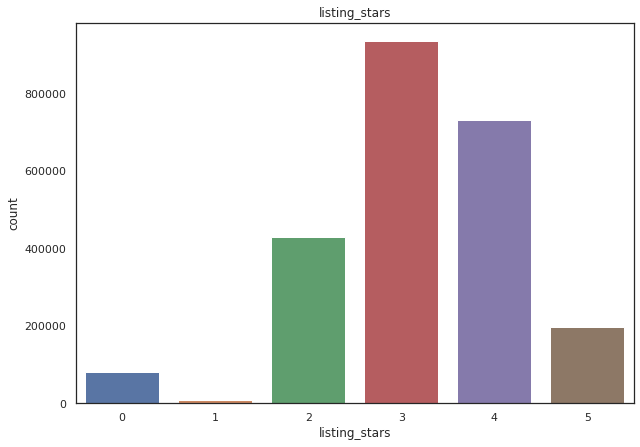

In [ ]:
#The star rating of the hotel, from 1 to 5, in increments of 1.  A 0 indicates the property has no stars, the star rating is not known or cannot be publicized.

sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(df_new['listing_stars'])
plt.title('listing_stars')
plt.show()




In [ ]:
df_new['listing_review_score'].value_counts()/len(df)*100

4.0    31.399626
4.5    31.243948
3.5    15.459323
3.0     7.575790
5.0     4.790770
0.0     4.695540
2.5     2.889282
2.0     1.234501
1.5     0.292032
1.0     0.272751
U       0.146436
Name: listing_review_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


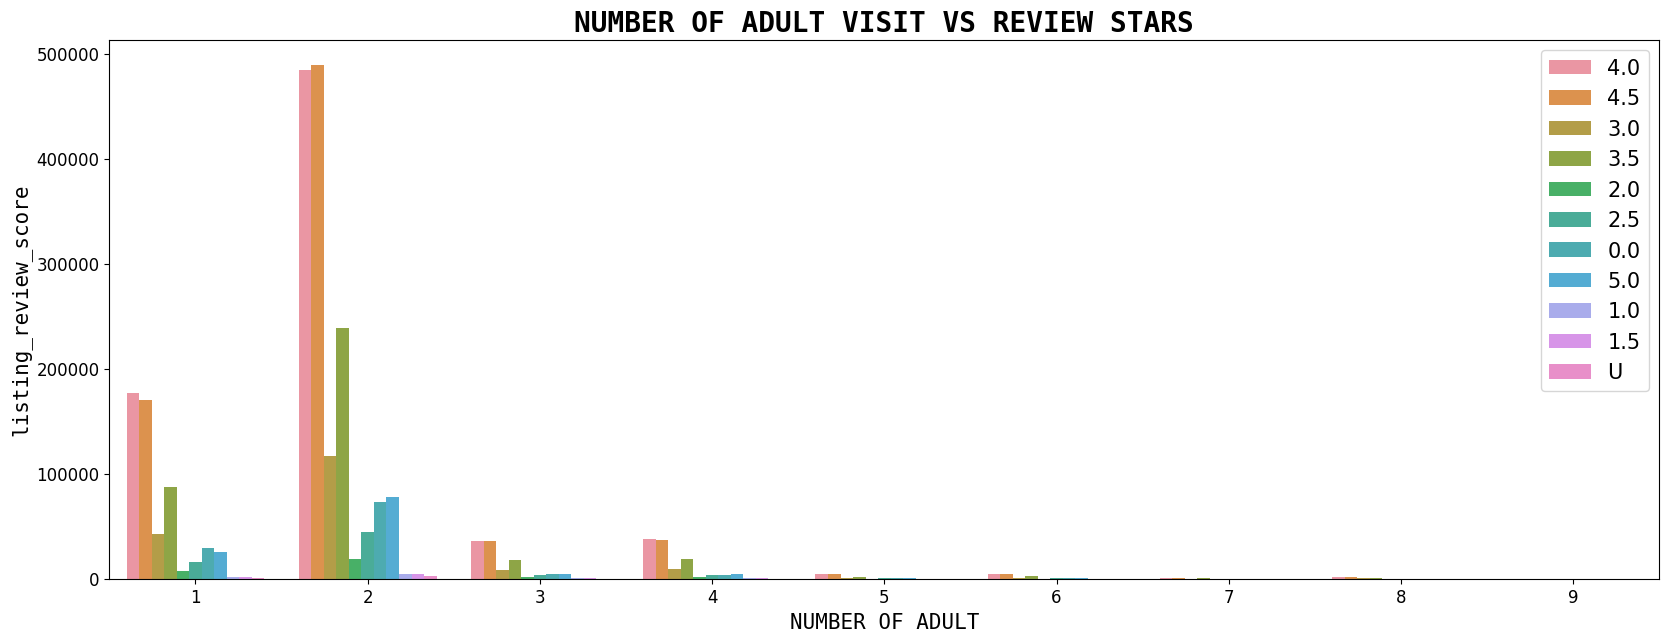

In [ ]:
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df_new['num_adults'], hue=df_new['listing_review_score'])
plt.title('NUMBER OF ADULT VISIT VS REVIEW STARS', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('NUMBER OF ADULT', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('listing_review_score', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

# is_brand	
Integer	+1 if the hotel is part of a major hotel chain;
 0 if it is an independent hotel

In [ ]:
df_new['is_brand'].value_counts()/len(df_new)*100

1    63.468802
0    36.531198
Name: is_brand, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


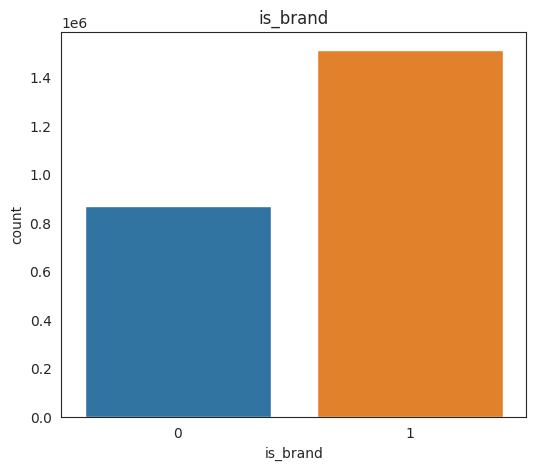

In [ ]:
sns.set_style('white')
plt.figure(figsize=(6,5))
sns.countplot(df_new['is_brand'])
plt.title('is_brand')
plt.show()


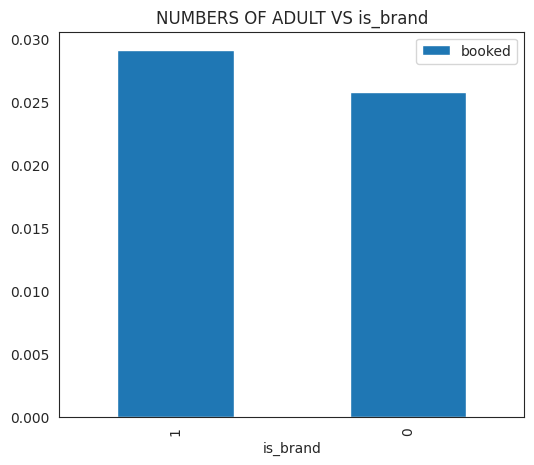

In [ ]:
plt.figure(figsize=(6,5))
df.groupby('is_brand')['booked'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('NUMBERS OF ADULT VS is_brand')
plt.legend()
plt.show()

In [ ]:
df_new['has_promotion'].value_counts()/len(df_new)*100

0    78.507635
1    21.492365
Name: has_promotion, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


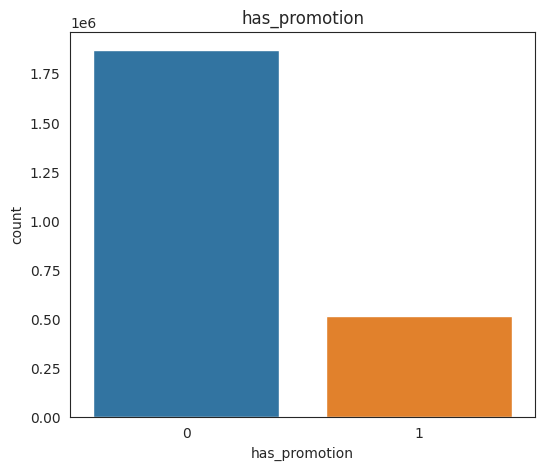

In [ ]:
sns.set_style('white')
plt.figure(figsize=(6,5))
sns.countplot(df_new['has_promotion'])
plt.title('has_promotion')
plt.show()


NUMBER OF ADULT 



In [ ]:
df_new['num_adults'].value_counts()/len(df_new)*100

2    65.348278
1    23.527603
4     4.883185
3     4.755694
6     0.603598
5     0.545839
8     0.207893
7     0.100733
9     0.027179
Name: num_adults, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


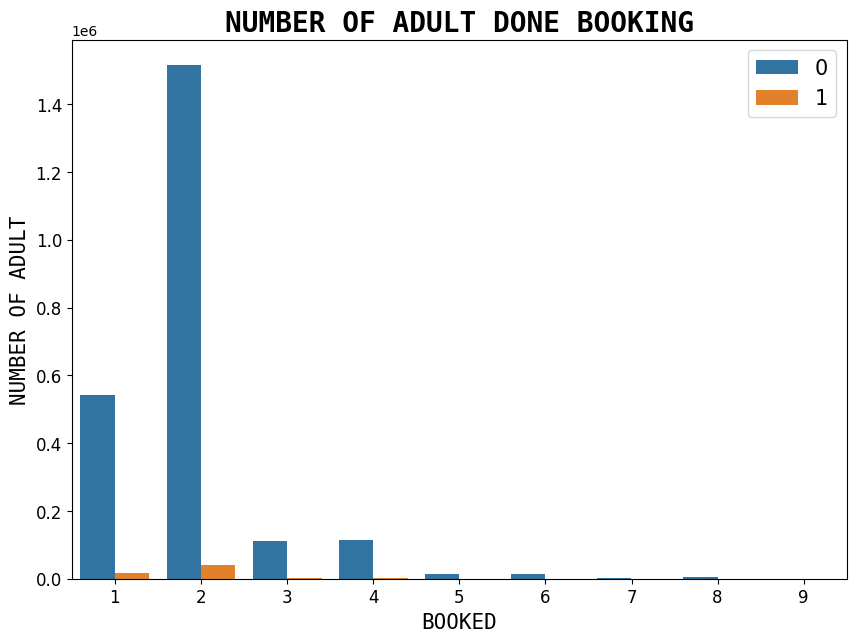

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 7))
sns.countplot(df_new['num_adults'], hue=df_new['booked'])
plt.title('NUMBER OF ADULT DONE BOOKING', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('BOOKED', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('NUMBER OF ADULT', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


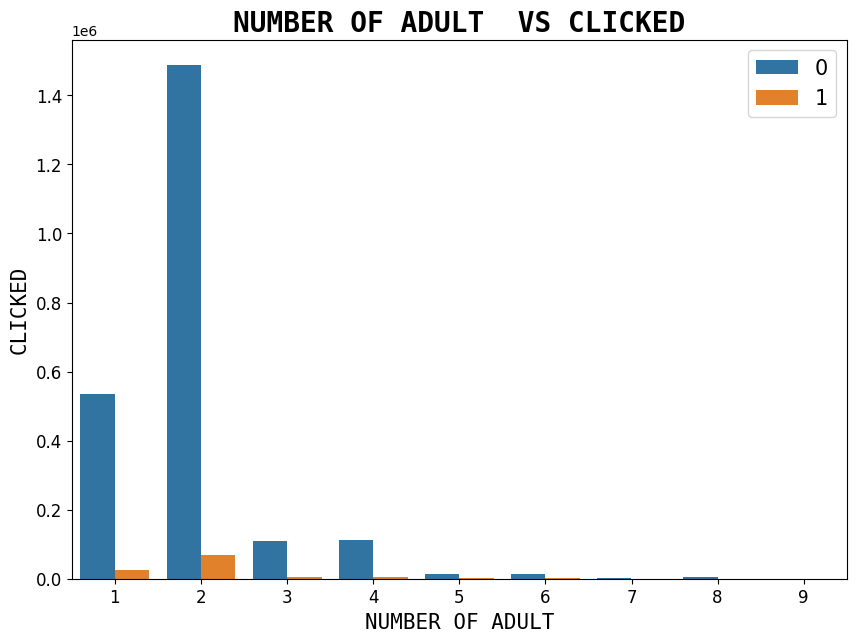

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 7))
sns.countplot(df_new['num_adults'], hue=df_new['clicked'])
plt.title('NUMBER OF ADULT  VS CLICKED', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('NUMBER OF ADULT', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('CLICKED', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

NUMBERS OF KIDS

In [ ]:
df_new['num_kids'].value_counts()/len(df_new)*100

0    76.837228
1    13.761863
2     7.739155
3     1.172793
4     0.373736
5     0.056961
6     0.039235
7     0.011930
8     0.006511
9     0.000588
Name: num_kids, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


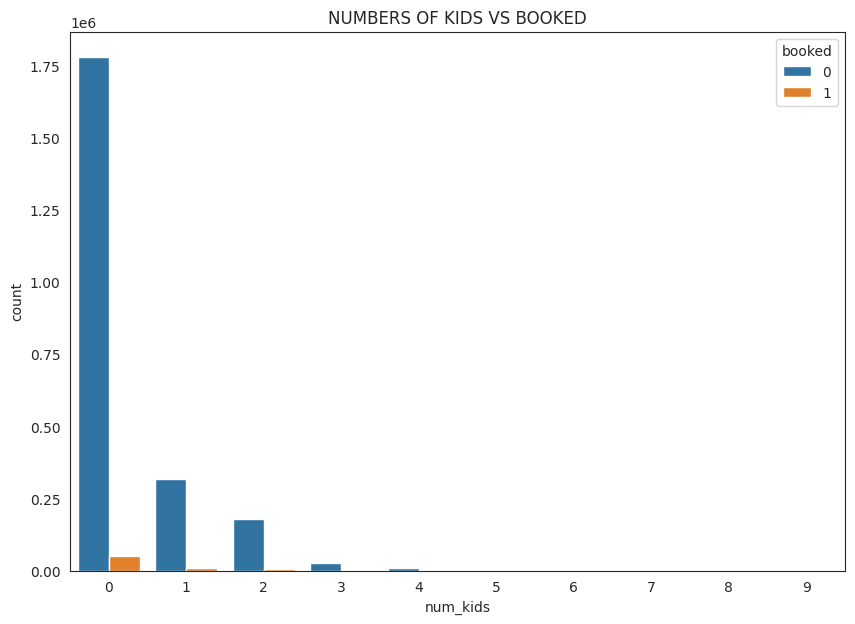

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(df_new['num_kids'],hue=df_new['booked'])
plt.title('NUMBERS OF KIDS VS BOOKED')
plt.show()


In [ ]:
df_new['num_rooms'].value_counts()/len(df_new)*100

1    91.190843
2     7.470983
3     0.878618
4     0.262250
5     0.082124
6     0.045200
8     0.042427
7     0.027557
Name: num_rooms, dtype: float64

STAY ON SATURDAY

In [ ]:
df_new['stay_on_saturday'].value_counts()/len(df_new)*100

0    50.173384
1    49.826616
Name: stay_on_saturday, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


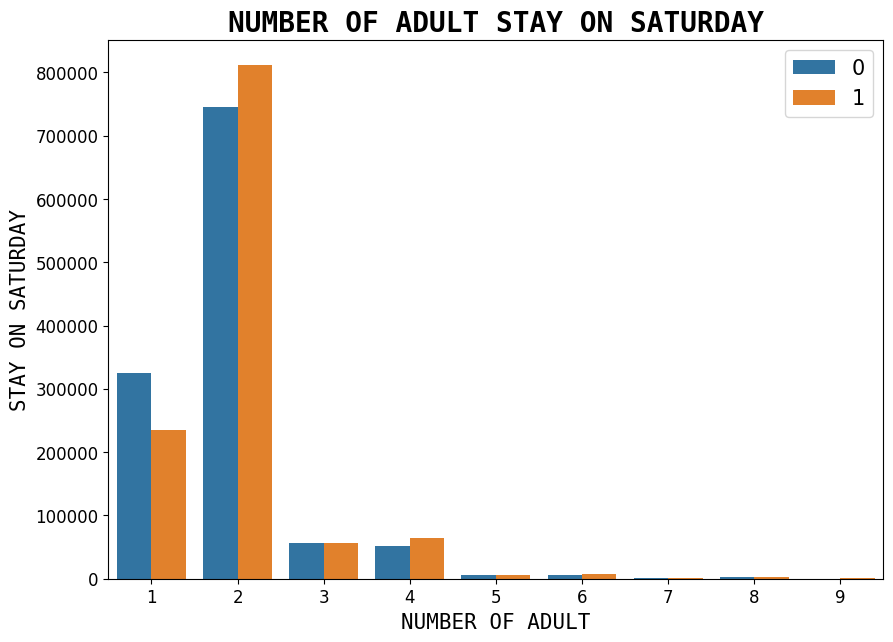

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 7))
sns.countplot(df_new['num_adults'], hue=df_new['stay_on_saturday'])
plt.title('NUMBER OF ADULT STAY ON SATURDAY', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('NUMBER OF ADULT', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('STAY ON SATURDAY', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


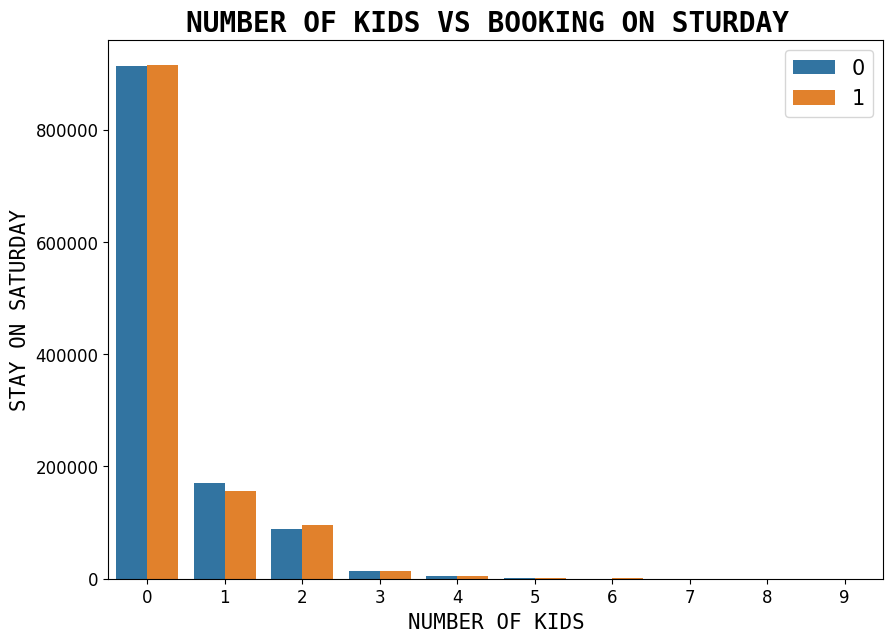

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 7))
sns.countplot(df_new['num_kids'], hue=df_new['stay_on_saturday'])
plt.title('NUMBER OF KIDS VS BOOKING ON STURDAY ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('NUMBER OF KIDS', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('STAY ON SATURDAY', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [ ]:
df_new['booked'].value_counts()/len(df_new)*100

0    97.211241
1     2.788759
Name: booked, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


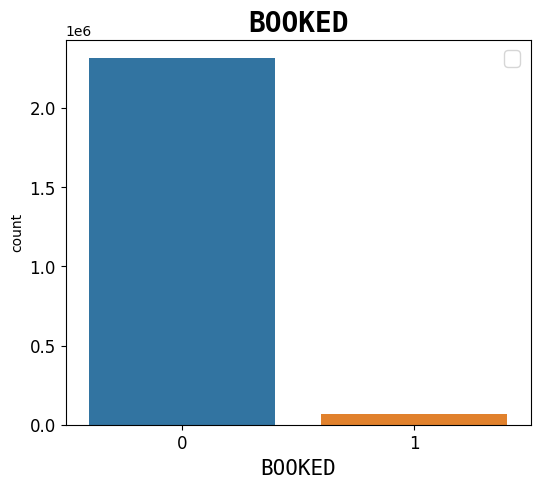

In [ ]:
plt.style.use('default')
plt.figure(figsize=(6,5))
sns.countplot(df_new['booked'])
plt.title('BOOKED', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('BOOKED', fontdict={'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [ ]:
df_new['clicked'].value_counts()/len(df_new)*100

0    95.543312
1     4.456688
Name: clicked, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


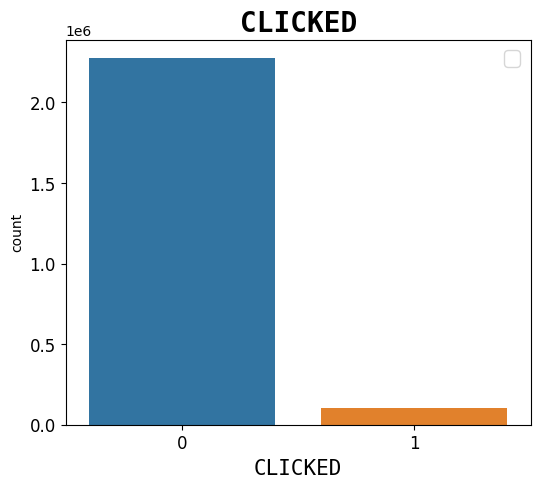

In [ ]:
plt.style.use('default')
plt.figure(figsize=(6,5))
sns.countplot(df_new['clicked'])
plt.title('CLICKED', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('CLICKED', fontdict={'fontname': 'Monospace', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [ ]:
df_new.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'listing_position', 'price_usd',
       'has_promotion', 'destination_id', 'length_of_stay', 'booking_window',
       'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday',
       'distance_to_dest', 'random_sort', 'clicked', 'booked',
       'location_score'],
      dtype='object')

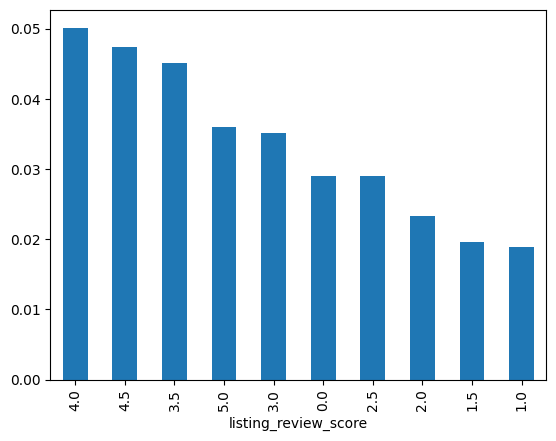

In [ ]:
df.groupby('listing_review_score')[ 'clicked'].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
df['listing_review_score'].head()

0    4.0
1    4.0
2    4.5
3    4.0
4    4.5
Name: listing_review_score, dtype: float64

CLICKED VS LISTING STARS

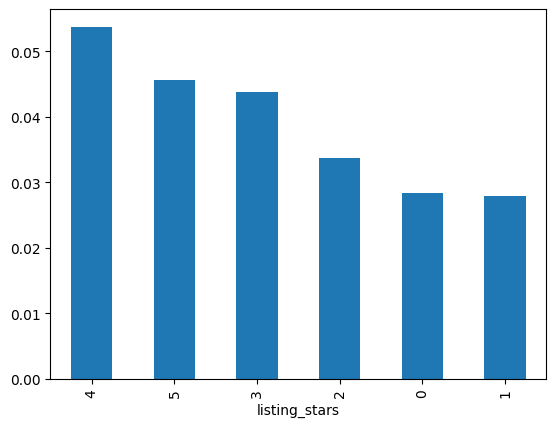

In [ ]:
df.groupby('listing_stars')[ 'clicked'].mean().sort_values(ascending=False).plot(kind='bar')

Text(0.5, 1.0, 'LISTING_STARS')

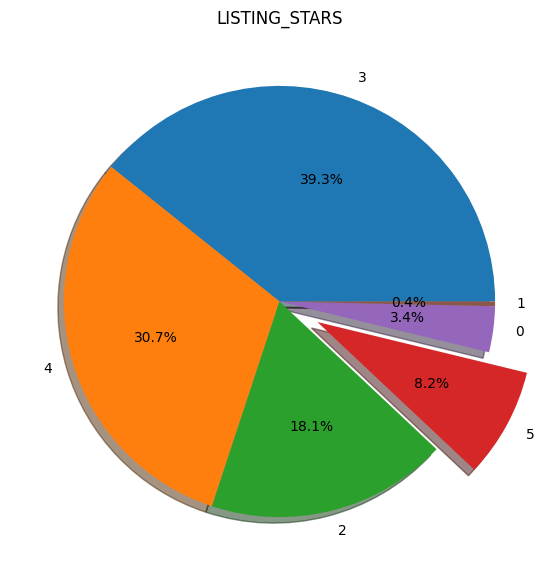

In [ ]:
relation_ship = df['listing_stars'].value_counts()/len(df)*100
plt.figure(figsize=(10,7))
plt.style.use('default')
plt.pie(relation_ship ,labels= relation_ship.index, explode = (0,0,0,0.20,0,0),shadow =True , autopct = '%1.1f%%')
plt.title('LISTING_STARS')


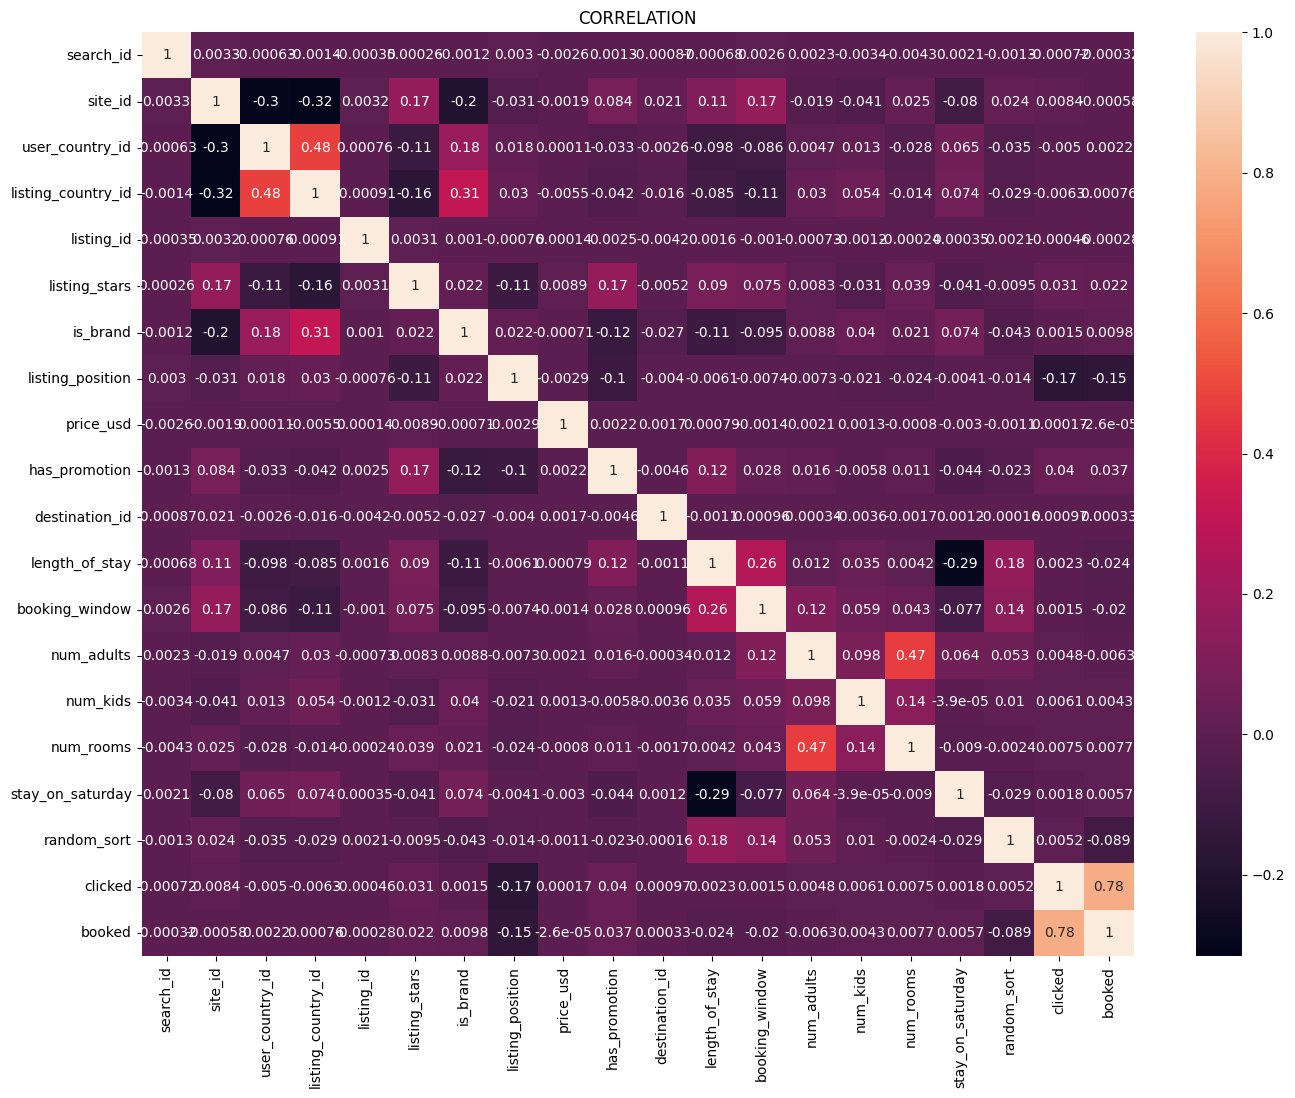

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df_new.corr(), annot = True)
plt.title('CORRELATION')
plt.show()


CHECKING SKEWNESS

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [ ]:
df_new.head()

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked,location_score
0,4,2012-12-31 08:59:22,5,219,219,3625,4,4.0,0,21,295.0,0,12588,2,46,1,0,1,1,238.35,1,0,0,3.4744
1,4,2012-12-31 08:59:22,5,219,219,11622,4,4.0,0,36,299.0,0,12588,2,46,1,0,1,1,238.34,1,0,0,U
2,4,2012-12-31 08:59:22,5,219,219,11826,5,4.5,1,22,373.0,1,12588,2,46,1,0,1,1,238.33,1,0,0,3.4124
3,4,2012-12-31 08:59:22,5,219,219,22824,3,4.0,0,4,329.0,0,12588,2,46,1,0,1,1,238.29,1,0,0,3.6329
4,4,2012-12-31 08:59:22,5,219,219,37581,5,4.5,0,26,600.0,0,12588,2,46,1,0,1,1,238.35,1,0,0,3.3408


In [ ]:
df_new.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


search_id              -0.004562
site_id                 1.453279
user_country_id        -1.049364
listing_country_id     -1.067757
listing_id              0.012977
listing_stars          -0.666650
is_brand               -0.559432
listing_position        0.179594
price_usd             453.804919
has_promotion           1.388013
destination_id          0.079124
length_of_stay          3.484501
booking_window          2.399389
num_adults              2.328857
num_kids                2.465520
num_rooms               6.344249
stay_on_saturday        0.006935
random_sort             0.889906
clicked                 4.414166
booked                  5.734716
dtype: float64

HANDLING SKEWNESS

In [ ]:
cols=['site_id',            
'user_country_id',          
'listing_country_id','price_usd','has_promotion','length_of_stay',
       'booking_window', 'num_adults', 'num_kids','num_rooms','clicked','booked']
for col in cols :
  df_new[col]=np.sqrt(df_new[col])

In [ ]:
df_new.sample(20)

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked,location_score
2117431,592692,2013-02-13 08:33:47,2.236068,3.872983,3.872983,123052,4,0.0,0,13,15.198684,0.0,1951,1.000000,1.414214,1.414214,0.0,1.000000,1,U,0,0.0,0.0,U
957119,268539,2013-05-08 15:17:54,2.236068,14.798649,14.798649,57978,2,2.5,0,6,11.789826,0.0,23389,1.414214,3.872983,1.000000,0.0,2.449490,1,1896.41,0,0.0,0.0,U
184181,51613,2013-02-25 18:56:23,4.358899,12.569805,6.244998,119045,2,3.0,1,4,7.839643,0.0,15122,1.732051,1.000000,1.000000,0.0,1.000000,0,U,0,0.0,0.0,3.1516
671827,188306,2013-01-11 11:27:07,2.236068,14.798649,14.798649,72968,2,3.0,1,3,7.211103,0.0,20491,1.414214,3.162278,1.000000,0.0,1.000000,0,2125.87,0,0.0,0.0,2.7574
1582420,444497,2013-06-16 05:47:53,2.236068,13.341664,11.357817,99903,5,4.5,1,9,14.899664,0.0,16076,1.732051,5.656854,1.000000,0.0,1.000000,1,U,0,0.0,0.0,5.1575
2102483,588286,2013-01-24 20:07:47,2.236068,14.798649,14.798649,71991,4,4.5,1,26,13.000000,0.0,10424,1.000000,3.464102,1.414214,0.0,1.000000,0,48.92,0,0.0,0.0,4.769
2129581,596087,2013-04-01 07:55:40,2.236068,14.798649,14.798649,4759,3,4.5,1,3,14.142136,0.0,15888,1.414214,2.000000,1.414214,0.0,1.000000,1,227.95,1,0.0,0.0,3.1512
1156260,323590,2012-11-01 21:10:48,2.236068,14.798649,14.798649,78574,3,5.0,1,1,9.899495,0.0,9104,1.000000,2.828427,1.414214,0.0,1.000000,1,U,1,0.0,0.0,1.7354
1986764,556012,2013-06-05 20:35:38,5.656854,14.832397,9.899495,14802,5,4.0,1,10,10.475209,1.0,25704,2.236068,7.348469,1.414214,0.0,1.000000,0,4378.02,1,0.0,0.0,4.0478
349274,98369,2013-03-21 22:31:58,4.242641,11.357817,11.747340,102787,5,4.5,1,6,14.185909,1.0,23276,2.000000,3.000000,1.414214,0.0,1.000000,1,392.25,0,0.0,0.0,4.7715


In [ ]:
df_new.isnull().sum()

search_id               0
timestamp               0
site_id                 0
user_country_id         0
listing_country_id      0
listing_id              0
listing_stars           0
listing_review_score    0
is_brand                0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
location_score          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


cols = ['listing_review_score','distance_to_dest','location_score','timestamp']


for col in cols:
  df_new[col] = le.fit_transform(df_new[col].astype(str))







In [ ]:
df_new.head()

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked,location_score
0,4,18347,2.236068,14.798649,14.798649,3625,4,7,0,21,17.175564,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128508,1,0.0,0.0,33309
1,4,18347,2.236068,14.798649,14.798649,11622,4,7,0,36,17.291616,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128507,1,0.0,0.0,69452
2,4,18347,2.236068,14.798649,14.798649,11826,5,8,1,22,19.313208,1.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128506,1,0.0,0.0,32394
3,4,18347,2.236068,14.798649,14.798649,22824,3,7,0,4,18.138357,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128502,1,0.0,0.0,35623
4,4,18347,2.236068,14.798649,14.798649,37581,5,8,0,26,24.494897,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128508,1,0.0,0.0,31306


In [ ]:
X = df_new.drop(['booked'],axis=1)
y = df_new['booked']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,train_size=0.8 ,random_state = 50)

In [ ]:
print("Number of booked X_train dataset: ", X_train.shape)
print("Number of booked y_train dataset: ", y_train.shape)
print("Number of booked X_test dataset: ", X_test.shape)
print("Number of booked y_test dataset: ", y_test.shape)

Number of booked X_train dataset:  (1904445, 23)
Number of booked y_train dataset:  (1904445,)
Number of booked X_test dataset:  (476112, 23)
Number of booked y_test dataset:  (476112,)


In [ ]:
print(X_train.ndim)
print(y_train.ndim)

2
1


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(X_train,y_train)
ss.transform(X_test)

array([[ 1.34779103, -0.60779269, -0.68679034, ..., -0.64957944,
        -0.21597734, -1.63870432],
       [-1.363078  ,  0.28498959, -0.68679034, ...,  1.5394576 ,
        -0.21597734,  0.20907052],
       [ 0.4691105 , -1.51043876,  0.72055119, ..., -0.64957944,
        -0.21597734, -0.28214622],
       ...,
       [ 1.2264505 , -1.63950217, -0.68679034, ..., -0.64957944,
        -0.21597734,  0.14022785],
       [-0.53591638,  0.12963481, -0.68679034, ..., -0.64957944,
        -0.21597734, -1.31380774],
       [ 0.7663774 , -0.95748599, -0.68679034, ...,  1.5394576 ,
         4.63011537, -0.96385038]])

RANDOM SAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [ ]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train.ravel())

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_res,y_res)
print("The score of logistic Regression : ",lr.score(X_test,y_test))

The score of logistic Regression :  0.5539221863763149


In [ ]:
lr_predict = lr.predict(X_test)

In [ ]:
print(classification_report(lr_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.55      0.98      0.71    262667
         1.0       0.54      0.03      0.06    213445

    accuracy                           0.55    476112
   macro avg       0.55      0.51      0.39    476112
weighted avg       0.55      0.55      0.42    476112



In [ ]:
data = pd.DataFrame(data={"Predicted booked":lr_predict, "Actual booked":y_test})
data.head(10)

,Predicted booked,Actual booked
2118795,1.0,0.0
253326,0.0,0.0
1508901,0.0,0.0
674105,0.0,0.0
336746,0.0,0.0
1385517,1.0,0.0
1170680,1.0,0.0
669449,1.0,0.0
1423324,0.0,0.0
1884161,0.0,0.0


CONFUSION MATRIX OF LOGISTIC REGRSSION

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,lr_predict)   # Y_test = actual value   y_pred = predicted value

array([[256548, 206264],
       [  6119,   7181]])

In [ ]:
pd.crosstab(y_test,lr_predict)

col_0,0.0,1.0
booked,,
0.0,256548,206264
1.0,6119,7181


In [ ]:
#   305212 ------- predicted correctly as booked
# 157600 3433 ----- this are the mistake done by classifer

Accuracy of LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_predict)*100

55.39221863763149

In [ ]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_precision_recall_curve   

In [ ]:
roc_auc_score(y_test,lr_predict)

0.5471246230707751

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


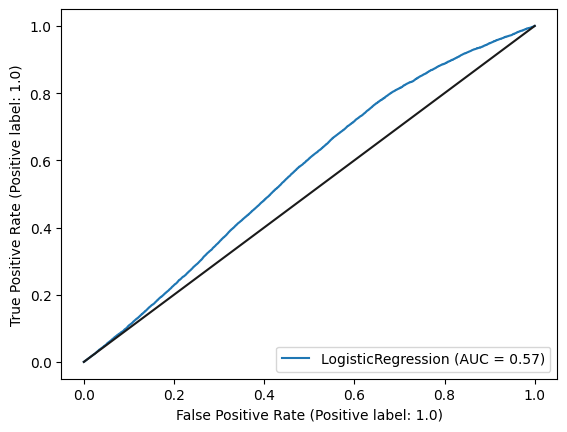

In [ ]:
plot_roc_curve(lr,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

MEAN ABSOLUTE ERROR OF LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,lr_predict)
print("Mean absolute value : ", mae)

Mean absolute value :  0.4460778136236852


R_2 of logistic Regression


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(lr_predict,y_test)
print("R2 score for the model is :", score*100)

R2 score for the model is : -80.3588174090201


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_res,y_res)
print("The score of RandomForest : ",rf.score(X_test,y_test))


The score of RandomForest :  0.9838147326679437


In [ ]:
rf_predict = rf.predict(X_test)

In [ ]:
print(classification_report(rf_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    455122
         1.0       1.00      0.63      0.78     20990

    accuracy                           0.98    476112
   macro avg       0.99      0.82      0.88    476112
weighted avg       0.98      0.98      0.98    476112



In [ ]:
data = pd.DataFrame(data={"Predicted booked":rf_predict, "Actual booked":y_test})
data.head(10)

,Predicted booked,Actual booked
2118795,0.0,0.0
253326,0.0,0.0
1508901,0.0,0.0
674105,1.0,0.0
336746,0.0,0.0
1385517,0.0,0.0
1170680,0.0,0.0
669449,0.0,0.0
1423324,0.0,0.0
1884161,0.0,0.0


In [ ]:
pd.crosstab(y_test,rf_predict)

col_0,0.0,1.0
booked,,
0.0,455114,7698
1.0,8,13292


ACURRACY OF RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_predict)*100

98.38147326679437

ROC AND AUC CURVE OF RANDOM FOREST

In [ ]:
roc_auc_score(y_test,rf_predict)

0.9913826962590698

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


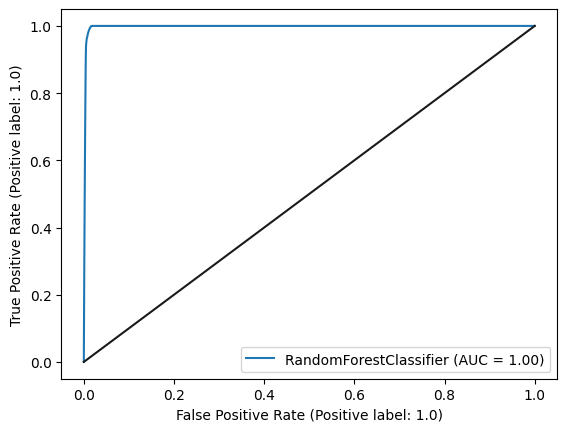

In [ ]:
plot_roc_curve(rf,X_test,y_test)
plt.plot([0,1],[0,1], c='k')    #------ base line classifier

MAE


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,rf_predict)
print("Mean absolute value : ", mae)

Mean absolute value :  0.016185267332056323


R2_SCORE

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(rf_predict,y_test)
print("R2 score for the model is :", score*100)

R2 score for the model is : 61.59410727682651


XGBOOST

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model.fit(X_res, y_res)
print("The score of XGBOOST: ",model.score(X_test,y_test))

The score of XGBOOST:  0.9845666565850052


In [ ]:
model_predict = model.predict(X_test)

In [ ]:
print(classification_report(model_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    455506
         1.0       1.00      0.64      0.78     20606

    accuracy                           0.98    476112
   macro avg       0.99      0.82      0.89    476112
weighted avg       0.98      0.98      0.98    476112



In [ ]:
data = pd.DataFrame(data={"Predicted booked":model_predict, "Actual booked":y_test})
data.head(10)

,Predicted booked,Actual booked
2118795,0.0,0.0
253326,0.0,0.0
1508901,0.0,0.0
674105,1.0,0.0
336746,0.0,0.0
1385517,0.0,0.0
1170680,0.0,0.0
669449,0.0,0.0
1423324,0.0,0.0
1884161,0.0,0.0


In [ ]:
pd.crosstab(y_test,model_predict)

col_0,0.0,1.0
booked,,
0.0,455485,7327
1.0,21,13279


ACURRACY OF XGBOOST

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_predict)*100

98.38147326679437

ROC AND AUC CURVE OF XGBOOST

In [ ]:
roc_auc_score(y_test,model_predict)

0.9912947851509105

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


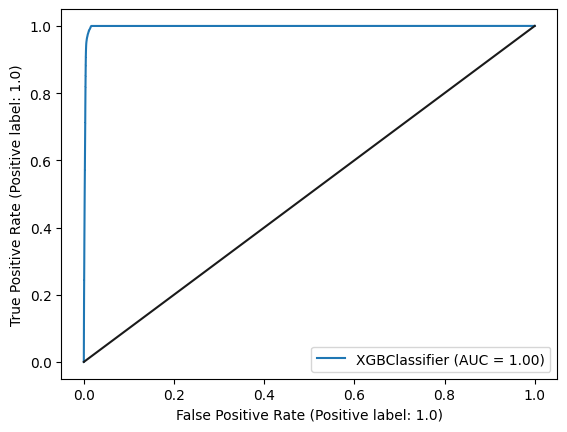

In [ ]:
plot_roc_curve(model,X_test,y_test)
plt.plot([0,1],[0,1], c='k')

MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,model_predict)
print("Mean absolute value : ", mae)

Mean absolute value :  0.01543334341499479


R2_SCORE

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(model_predict,y_test)
print("R2 score for the model is :", score*100)

R2 score for the model is : 62.72733226524434


In [ ]:
df_new.head()

,search_id,timestamp,site_id,user_country_id,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked,location_score
0,4,18347,2.236068,14.798649,14.798649,3625,4,7,0,21,17.175564,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128508,1,0.0,0.0,33309
1,4,18347,2.236068,14.798649,14.798649,11622,4,7,0,36,17.291616,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128507,1,0.0,0.0,69452
2,4,18347,2.236068,14.798649,14.798649,11826,5,8,1,22,19.313208,1.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128506,1,0.0,0.0,32394
3,4,18347,2.236068,14.798649,14.798649,22824,3,7,0,4,18.138357,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128502,1,0.0,0.0,35623
4,4,18347,2.236068,14.798649,14.798649,37581,5,8,0,26,24.494897,0.0,12588,1.414214,6.78233,1.0,0.0,1.0,1,128508,1,0.0,0.0,31306


CLUSTTERING


In [ ]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs
from matplotlib import pyplot

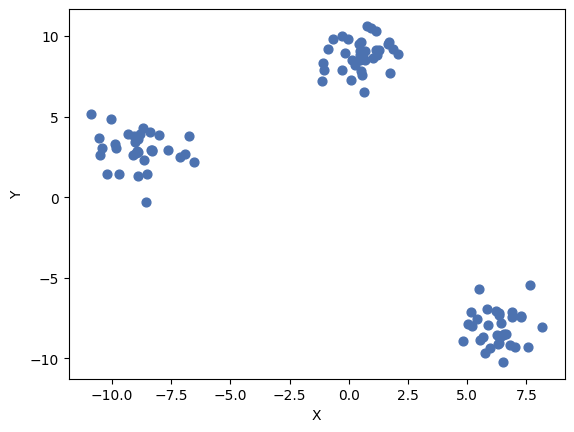

<Figure size 640x480 with 0 Axes>

In [ ]:
df_new = make_blobs(n_samples = 100, centers = 3,
               cluster_std = 1, n_features = 2)
 
plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'b')
plt.xlabel("X")
plt.ylabel("Y")
 
plt.show()
plt.clf()

In [ ]:
points = df_new[0]

In [ ]:
k = range(1,11)
wss= []
points = df_new[0]
for i in k:
  km = KMeans(n_clusters=i)
  km.fit(points)
  wss.append(km.inertia_)     

In [ ]:
my_centers = pd.DataFrame({'Clusters' : k, 'WSS' : wss})
my_centers

,Clusters,WSS
0,1,1969.921538
1,2,817.989121
2,3,199.416473
3,4,167.164493
4,5,140.382909
5,6,114.916200
6,7,97.426702
7,8,78.862199
8,9,64.453180
9,10,58.947144


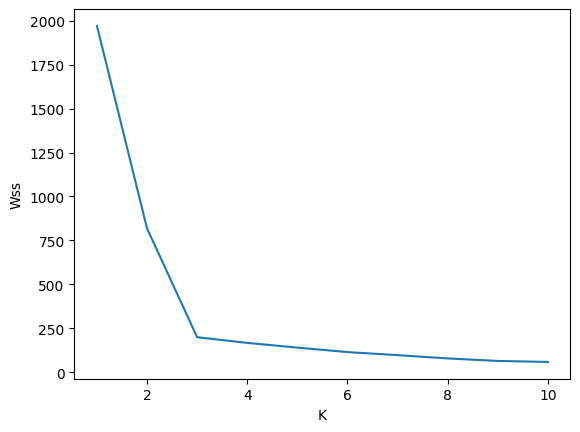

In [ ]:
plt.xlabel('K')
plt.ylabel('Wss')
plt.plot(k,wss)

IMPORTING KMEANS

In [ ]:
kmeans =cluster.KMeans(n_clusters=3,init="k-means++")
kmeans = kmeans.fit(points)
kmeans

KMeans(n_clusters=3)

CLUSTER CENTERS

In [ ]:
# clusters centers
cluster=kmeans.cluster_centers_
cluster

array([[ -1.35825766,   2.353783  ],
       [-10.0104771 ,   3.24206536],
       [ -5.61777594,  -1.9814728 ]])

In [ ]:
kmeans_predict = kmeans.fit_predict(points)
kmeans_predict

array([0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0], dtype=int32)

In [ ]:
data = pd.DataFrame(data={"Predicted value ":kmeans_predict})
data.head(10)

,Predicted value
0,0
1,2
2,1
3,2
4,2
5,1
6,2
7,0
8,1
9,0


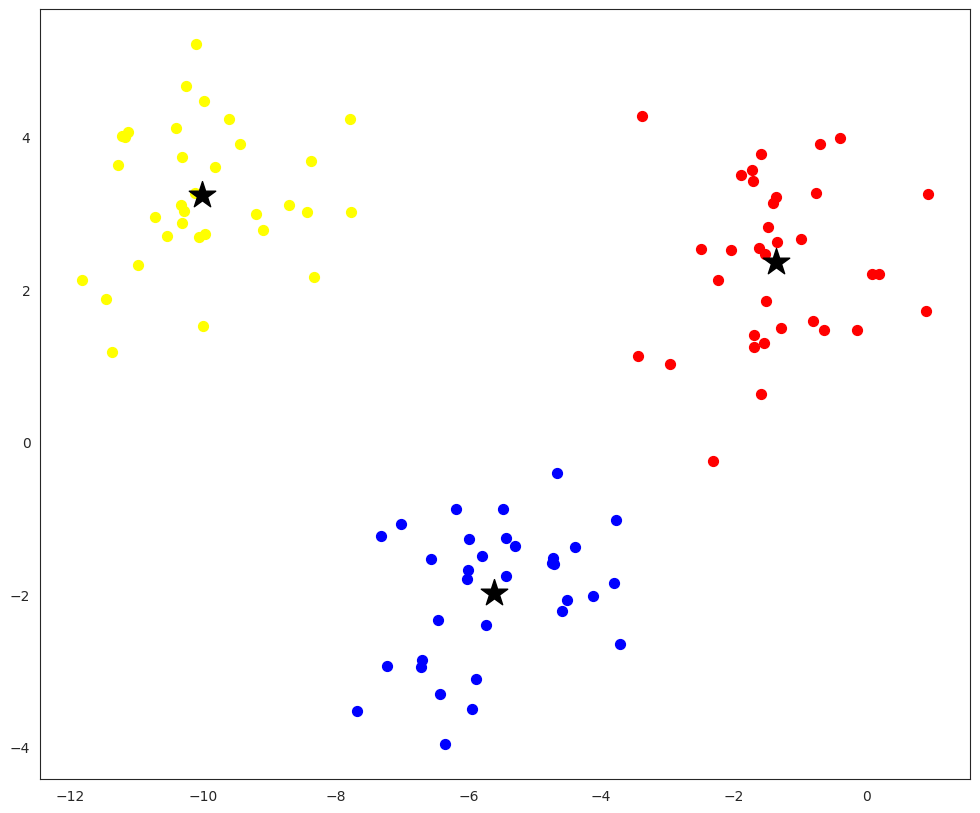

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style('white')
plt.scatter(points[kmeans_predict==0,0], points[kmeans_predict==0,1], s=50, color = 'red')
plt.scatter(points[kmeans_predict==1,0], points[kmeans_predict==1,1], s=50, color = 'yellow')
plt.scatter(points[kmeans_predict==2,0], points[kmeans_predict==2,1], s=50, color = 'blue')
#plt.scatter(points[kmeans_predict==3,0], points[kmeans_predict==3,1], s=50, color = 'orange')
plt.scatter(cluster[0][0],cluster[0][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[1][0],cluster[1][1],marker='*', s=400 , color = 'black')
plt.scatter(cluster[2][0],cluster[2][1],marker='*', s=400 , color = 'black')
#plt.scatter(cluster[3][0],cluster[3][1],marker='*', s=400 , color = 'black')